In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score 

In [2]:
import csv
import math as m
l1 = 50
l2 = 40
with open('robot2.csv','w') as file:
  writer = csv.writer(file)
  writer.writerow(['tt1','tt2','Px','Py'])

  for tt1 in range(-180,181,1):
    for tt2 in range(-180,181,1):
      #tt1 = (tt1*m.pi)/180
      #tt2 = (tt2*m.pi)/180
      Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2)
      Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2)
      writer.writerow([tt1,tt2,Px,Py])

In [3]:
data=pd.read_csv('robot2.csv')
data

,tt1,tt2,Px,Py
0,-180,-180,-41.270647,1.701003
1,-180,-179,-3.778171,9.784744
2,-180,-178,9.676867,45.701238
3,-180,-177,-13.276034,76.429027
4,-180,-176,-51.534081,73.717123
...,...,...,...,...
130316,180,176,-51.534081,-73.717123
130317,180,177,-13.276034,-76.429027
130318,180,178,9.676867,-45.701238
130319,180,179,-3.778171,-9.784744


In [4]:
x=data.drop(data.columns[:2],axis=1)

In [5]:
y=data.drop(data.columns[2:],axis=1)

In [6]:
x

,Px,Py
0,-41.270647,1.701003
1,-3.778171,9.784744
2,9.676867,45.701238
3,-13.276034,76.429027
4,-51.534081,73.717123
...,...,...
130316,-51.534081,-73.717123
130317,-13.276034,-76.429027
130318,9.676867,-45.701238
130319,-3.778171,-9.784744


In [7]:
y

,tt1,tt2
0,-180,-180
1,-180,-179
2,-180,-178
3,-180,-177
4,-180,-176
...,...,...
130316,180,176
130317,180,177
130318,180,178
130319,180,179


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout 
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(2,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1536      
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 57,988
Trainable params: 57,988
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128,epochs=500,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)],validation_data = (x_test, y_test))

Epoch 1/500
764/764 [==============================] - 8s 9ms/step - loss: 10859.4883 - accuracy: 0.5002 - val_loss: 10863.3184 - val_accuracy: 0.5035
Epoch 2/500
764/764 [==============================] - 6s 7ms/step - loss: 10859.5430 - accuracy: 0.5007 - val_loss: 10863.3174 - val_accuracy: 0.5035
Epoch 3/500
764/764 [==============================] - 7s 9ms/step - loss: 10859.5596 - accuracy: 0.5007 - val_loss: 10863.3174 - val_accuracy: 0.5035
Epoch 4/500
764/764 [==============================] - 6s 8ms/step - loss: 10859.5635 - accuracy: 0.5007 - val_loss: 10863.3174 - val_accuracy: 0.5035
Epoch 5/500
764/764 [==============================] - 6s 8ms/step - loss: 10859.5576 - accuracy: 0.5007 - val_loss: 10863.3174 - val_accuracy: 0.5035
Epoch 6/500
764/764 [==============================] - 5s 6ms/step - loss: 10859.5596 - accuracy: 0.5007 - val_loss: 10863.3174 - val_accuracy: 0.5035
Epoch 7/500
764/764 [==============================] - 4s 5ms/step - loss: 10859.5605 - accura

Sai số:  10863.314453125
Độ chính xác:  0.5034529566764832


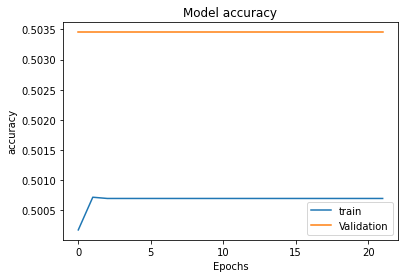

In [11]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','Validation'])
plt.show()

In [12]:
model.save('robot2.h5')